In [1]:
def hama_response():
    #select a random response within 10-99
    filename = 'ave1/C1--HighPulse-in-100-out1700-an2100--000' + str(np.random.randint(10,99)) + '.txt'
    print filename
    df = pd.read_table(filename, sep="\t", names={'I','II'},
                       dtype = {'I': np.float64, 'II': np.float64}, usecols = [1,0], skiprows=5) 
    time = df['I'].tolist()
    time = [ time[i]* 1.0e9 for i in range(len(time))]
    h = df['II'].tolist()
    return time,h

ave1/C1--HighPulse-in-100-out1700-an2100--00060.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00057.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00045.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00043.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00085.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00026.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00041.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00050.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00079.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00061.txt
ave1/C1--HighPulse-in-100-out1700-an2100--00065.txt


<IPython.core.display.Javascript object>


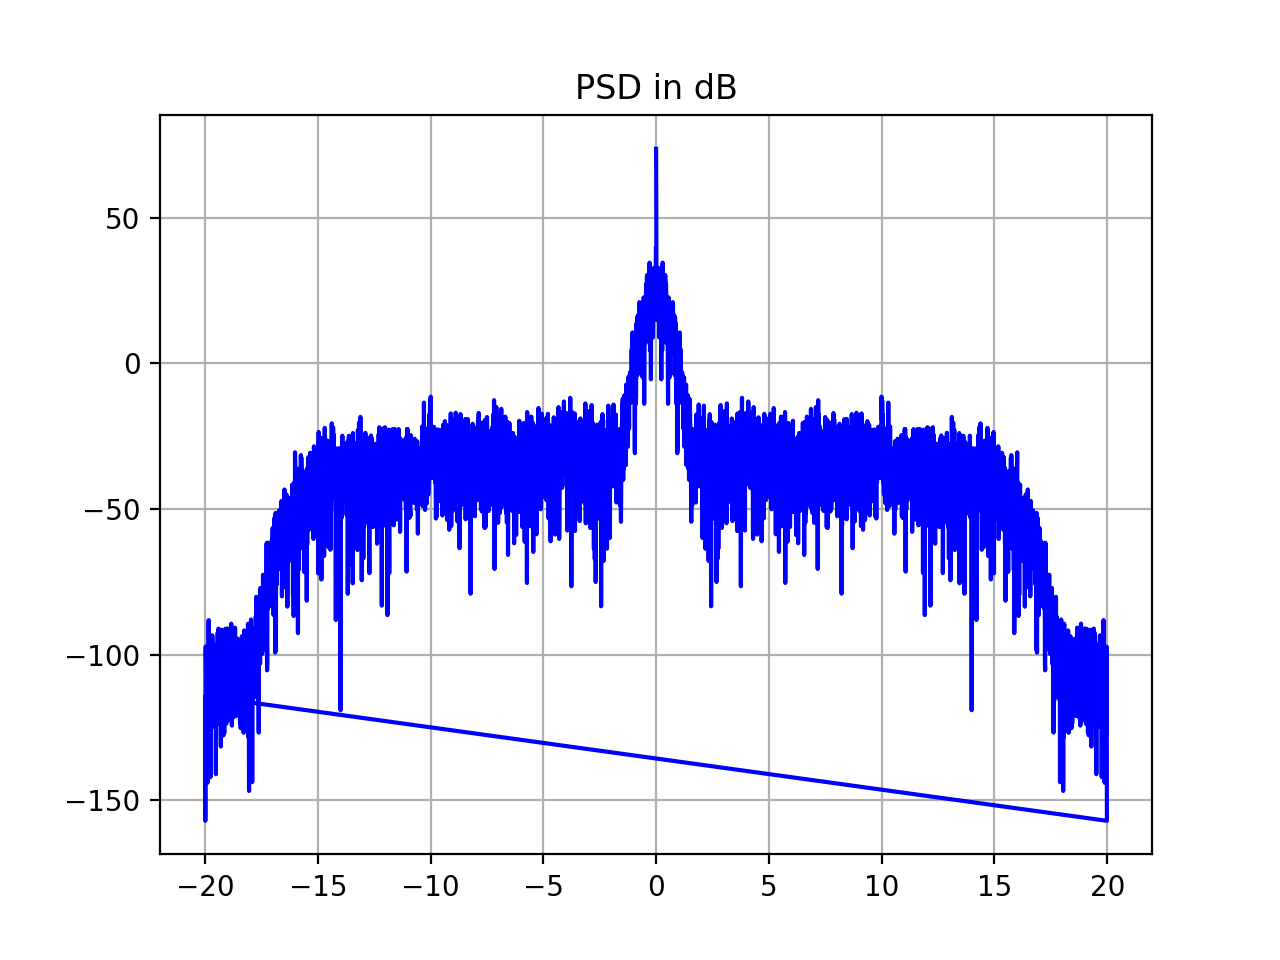

<IPython.core.display.Javascript object>


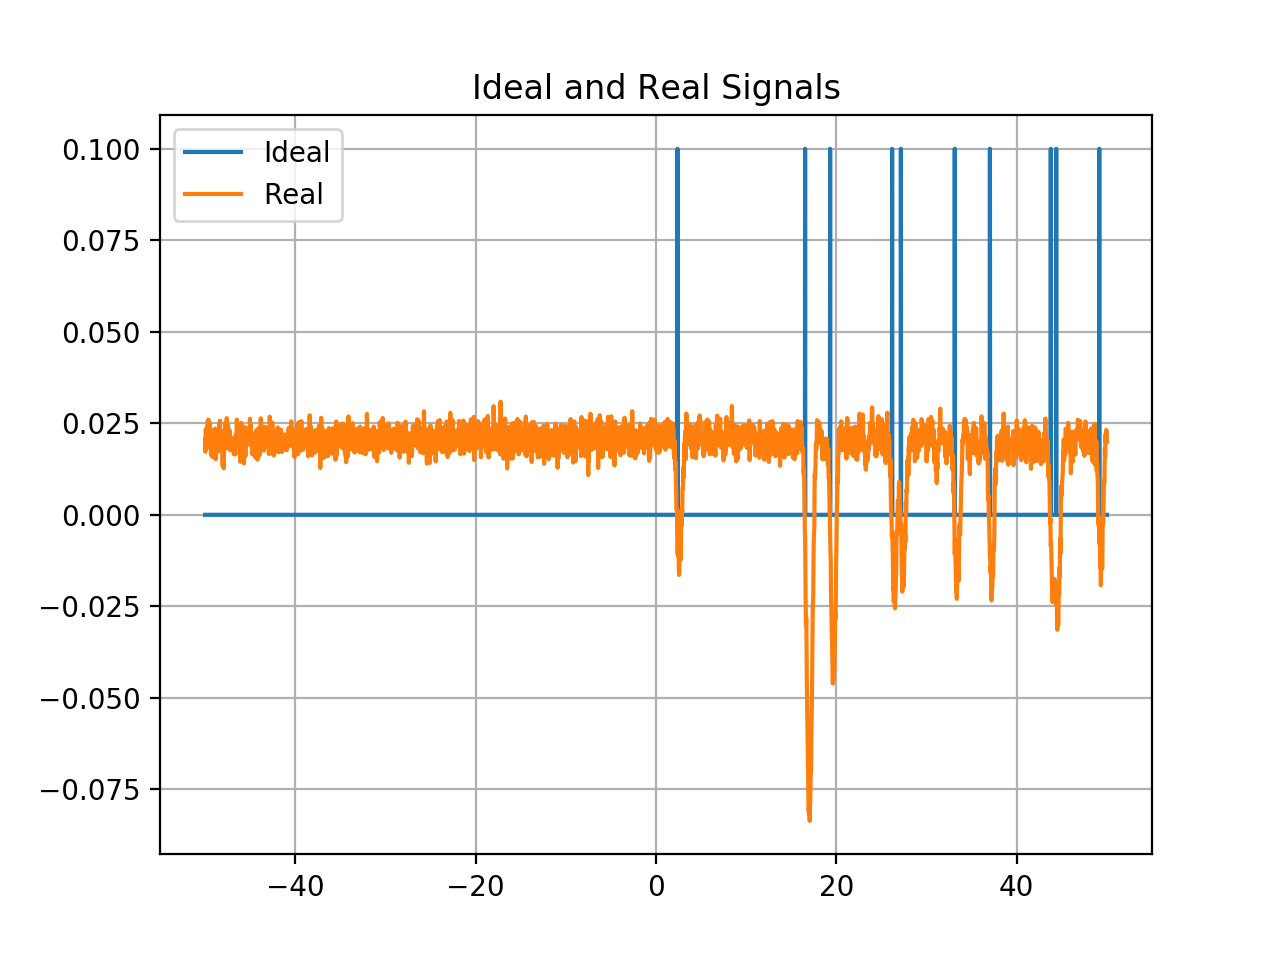

In [11]:
%matplotlib notebook

import numpy as np
from scipy.fftpack import fft, fftfreq, ifft
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt

#number of real random peaks
N = 10

#this operation is just to receive the timeframe to initialize
t, h = hama_response()
sig_i = np.zeros(len(t))
sig_r = np.zeros(len(t))

#generating peaks
for i in range(N):
    time, h = hama_response()
    idx = np.random.randint(len(time)/2,len(time))
    sig_i += signal.unit_impulse(len(time), idx=idx)
    freq = fftfreq(len(h),d = time[1]-time[0])
    H = fft(h)
    G = np.exp(-2*np.pi*1j*freq*time[idx])*H
    g = np.real(ifft(G))
    sig_r += g 

sig_i = sig_i/N
sig_r = sig_r/N

#PSD calculation
psdg = np.abs(fft(sig_r)**2)

fig = plt.figure()
ax = fig.subplots()
ax.plot(fftfreq(len(h),d = t[1]-t[0]),20*np.log10(psdg),color='blue')
ax.set_title(label='PSD in dB')
ax.grid(True)

fig = plt.figure()
ax = fig.subplots()
ax.plot(time,sig_i,label='Ideal')
ax.plot(time,sig_r,label='Real')
ax.set_title(label='Ideal and Real Signals')
ax.grid(True)
ax.legend()